In [67]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd
import numpy as np

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,0.0,0.0


In [8]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24111, freq=None)

<AxesSubplot:xlabel='Date'>

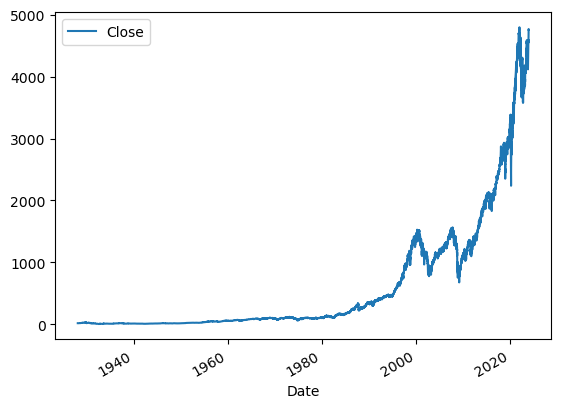

In [9]:
sp500.plot.line(y="Close", use_index=True)

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [11]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000


In [13]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [14]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1


In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1


In [19]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [21]:
preds = model.predict(test[predictors])

In [23]:
preds = pd.Series(preds, index=test.index)

In [25]:
precision_score(test["Target"], preds)

0.5230769230769231

In [26]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

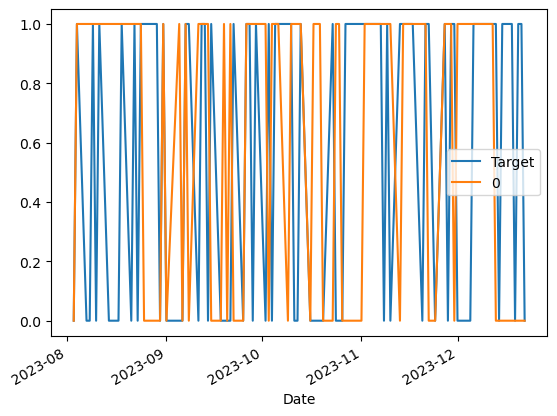

In [27]:
combined.plot()

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [30]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [36]:
predictions = backtest(sp500, model, predictors)

In [37]:
predictions["Predictions"].value_counts()

0    3424
1    2637
Name: Predictions, dtype: int64

In [38]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5305271141448615

In [40]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.5344
0    0.4656
Name: Target, dtype: float64

In [76]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [89]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.203954,529.0


In [90]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=50, random_state=1)

In [91]:
def predict(train, test, predictors, model, threshold=0.6):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [92]:
predictions = backtest(sp500, model, new_predictors)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [87]:
predictions["Predictions"].value_counts()

0    3424
1    2637
Name: Predictions, dtype: int64

In [88]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5305271141448615

In [70]:
train.replace([np.inf, -np.inf], np.finfo('float32').max, inplace=True)
test.replace([np.inf, -np.inf], np.finfo('float32').max, inplace=True)

C:\Users\Akram\anaconda3\envs\p3workshop\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
